In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,18 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,2 months and 19 days
H2O cluster name:,H2O_from_python_youdan_awm84k
H2O cluster total nodes:,1
H2O cluster free memory:,1.311 Gb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [4]:
df = pd.read_csv("/home/youdan/Documents/Practicum/Encoding_Version4.csv", sep=',', encoding='latin-1')
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others
0,1,10100,Titanic,Titanic,1997,194.0,0.0,28638131,2674,3265,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,158411483,4366,4366,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,1554475,43,2375,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,108037878,4163,4223,...,1,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,11911430,1101,3010,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
cols = list(df)
cols.insert(-1, cols.pop(cols.index('opening_weekend_revenue')))
cols
cols.insert(-1, cols.pop(cols.index('Rank.others')))
#cols

In [6]:
df = df.ix[:,cols]
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,1,10100,Titanic,Titanic,1997,194.0,0.0,2674,3265,87202,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28638131
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,43,2375,43684,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1554475
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,4163,4223,33603,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,108037878
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,1101,3010,62065,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11911430


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
0,10100,Titanic,Titanic,1997,194.0,0.0,2674,3265,87202,200000000,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28638131
1,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,4366,4366,39170,185000000,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,158411483
2,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,43,2375,43684,11000000,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1554475
3,40100,Shrek 2,Shrek 2,2004,92.0,1.0,4163,4223,33603,70000000,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,108037878
4,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,1101,3010,62065,10500000,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11911430


In [8]:
df.to_csv('opening_weekend_revenue.csv')

In [9]:
path = '/home/youdan/Documents/Practicum/opening_weekend_revenue.csv'
frame = h2o.import_file(path=path) # multi-threaded import
frame.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:10594
Cols:60




,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,domestic_box_office,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue
type,int,int,string,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,10100.0,NaN,NaN,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5296.5,115875216.10345477,NaN,NaN,2006.8768170662638,97.1203738317756,0.04843601895734597,690.8191429110826,770.4321313951297,3971.1731168586007,13874950.005663572,18817316.41891638,23700190.34523137,25434537.117141757,15.635831602794036,0.1363979611100623,0.003209363790824995,0.46913347177647724,0.033226354540305834,0.03162167264489334,0.18302812912969604,0.14338304700774024,0.15747103868054194,0.22364029059493418,0.34223443942666404,0.36756332220695076,0.029255841350873748,0.354408010995484,0.30335754957785194,0.9393130450258053,0.29115500978821857,0.29186688022779855,0.25093432995194875,0.2407901761879338,0.06248820086841608,0.04578063054559185,0.218331130828771,0.0047196526335661695,0.13045119879176892,0.30536152539173117,0.03804040022654333,0.009533698319803663,0.1129884840475741,0.0686237492920521,0.0036813290541816124,0.016518784217481593,0.001699074948083821,0.34642250330375685,0.0002831791580139702,0.08778553898433075,0.20237870492731735,0.34491221446101566,0.6189910979228487,0.05594207014056511,0.024563396279994317,0.04671304841686781,0.09456197643049835,0.05849779923328127,0.7197217094987931,5091609.640362451
maxs,10593.0,284460100.0,NaN,NaN,2017.0,600.0,1.0,4468.0,4468.0,87202.0,425000000.0,936662225.0,2023411357.0,3926220158.0,86.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,247966675.0
sigma,3058.36871005879,73795347.49056596,NaN,NaN,7.246012430689698,35.68271325565838,0.21469592487208042,1194.5515895877886,1211.0350312240892,7296.221585490208,32428855.81257,49544119.22891575,79907153.02579232,81581240.00872976,8.748804928832836,0.3432268597563215,0.056562936387576646,0.4990699029049416,0.17923558887256325,0.17499895204443025,0.38670783401998826,0.3504795909867218,0.36428006536298047,0.41672461972231983,0.4745042006820493,0.48218894479410784,0.16853935582423948,0.47838050394022985,0.4597534658832248,0.23877645434631053,0.4543352355118052,0.4546618451710317,0.4335893793321747,0.4276012246670089,0.24205155651442375,0.2090188707748133,0.4131328588104461,0.0685406518370333,0.3368150707554786,0.4605821190148933,0.19130285585735743,0.09717869280693708,0.31659366336356903,0.2528251648517537,0.06056503212180223,0.1274654762343041,0.041186748061616936,0.4758522107022408,0.016826339253588646

In [10]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])
y = 'opening_weekend_revenue'
X = [name for name in frame.columns if name not in ['Unnamed: 0 ', 'C1','odid', 'odname', 'domestic_box_office', 'international_box_office','inflation_adjusted_domestic_box_office',y]]
print(y)
print(X)

opening_weekend_revenue
['display_name', 'od_name', 'production_year', 'running_time', 'sequel', 'opening_weekend_theaters', 'maximum_theaters', 'theatrical_engagements', 'production_budget', 'name_length', 'source_category.fiction_tale_novel', 'source_category.music_dance', 'source_category.original_screenplay', 'source_category.others', 'source_category.play_TV_movie_film', 'source_category.real_factual', 'source_category.NA', 'production_companies_size.Big_15', 'production_companies_size.Extra_small', 'production_companies_size.Large', 'production_companies_size.Medium', 'production_companies_size.NULL', 'production_companies_size.Others', 'production_companies_size.Small', 'Rank.others.x', 'Rank.act_1000', 'Rank.act_250', 'Rank.act_500.x', 'Rank.act_750', 'genre.Action', 'genre.Adventure', 'genre.Comedy', 'genre.Concert/Performance', 'genre.Documentary', 'genre.Drama', 'genre.Horror', 'genre.Musical', 'genre.Others', 'genre.Thriller/Suspense', 'genre.Western', 'rating.G', 'rating.N

In [11]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [12]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.3        10    250         0.6   
1                0.3        16     50         0.6   
2                0.4        10    100         0.6   
3                0.3        18    300         0.8   
4                0.6        18    100         0.1   
5                0.7         4    200         0.3   
6                0.2        14    150         0.5   
7                0.5        14    250         0.2   
8                0.2        18    350         0.5   
9                0.4        10    100         0.3   
10               0.7        10    300         0.3   
11               1.0        12     50         1.0   
12               0.9        18    150         1.0   
13               0.3        12    200         0.1   
14               1.0        10    300         0.8   
15               0.4        14    450         0.1   
16               0.1        10    400         0.1   
17               0.5        16      0         

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-08-09 12:01:06,32.531 sec,0.0,14884251.0762023,7522932.3997815,221540930099428.7187500,13557878.5920418,7479167.0387013,183816071916544.5000000
,2017-08-09 12:01:06,32.569 sec,1.0,13760777.7364060,6795688.5285582,189359003910766.9687500,12496472.5031604,6755974.4353661,156161825022243.4062500
,2017-08-09 12:01:06,32.596 sec,2.0,12671364.0946424,6134899.9954144,160563468018993.6875000,11477913.3019423,6102167.9167823,131742493766903.0625000
,2017-08-09 12:01:06,32.622 sec,3.0,11842101.6450433,5581201.4964012,140235371371536.2500000,10643531.6523786,5544801.9361157,113284766035186.0156250
,2017-08-09 12:01:06,32.650 sec,4.0,10937293.0540207,5054946.8544230,119624379349529.4062500,9860516.0981840,5042419.0980366,97229777722546.0156250
---,---,---,---,---,---,---,---,---,---
,2017-08-09 12:01:09,36.243 sec,66.0,3495424.2878201,921048.4523676,12217990951882.4082031,4966480.2276763,1545754.0187810,24665925851899.8203125
,2017-08-09 12:01:09,36.338 sec,67.0,3480603.0483884,919929.7377348,12114597580450.5273438,4976028.0608303,1548031.8835935,24760855262170.8984375
,2017-08-09 12:01:10,36.422 sec,68.0,3462891.1934177,919062.5412798,11991615417449.8281250,4970784.7881827,1549871.4424014,24708701410428.7304688
,2017-08-09 12:01:10,36.511 sec,69.0,3443823.8569367,914041.5831007,11859922757606.1191406,4975699.9523771,1551297.4242154,24757590016085.0703125



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
maximum_theaters,1407394262445719552.0000000,1.0,0.3348475
opening_weekend_theaters,1241425181256187904.0000000,0.8820735,0.2953601
theatrical_engagements,542401627286405120.0000000,0.3853942,0.1290483
production_budget,480129274418823168.0000000,0.3411477,0.1142324
Rank.others.y,76410174025236480.0000000,0.0542919,0.0181795
---,---,---,---
source_category.NA,35869290496.0000000,0.0000000,0.0000000
genre.Others,10548208640.0000000,0.0000000,0.0000000
source_category.music_dance,0.0,0.0,0.0
rating.NC-17,0.0,0.0,0.0



See the whole table with table.as_data_frame()


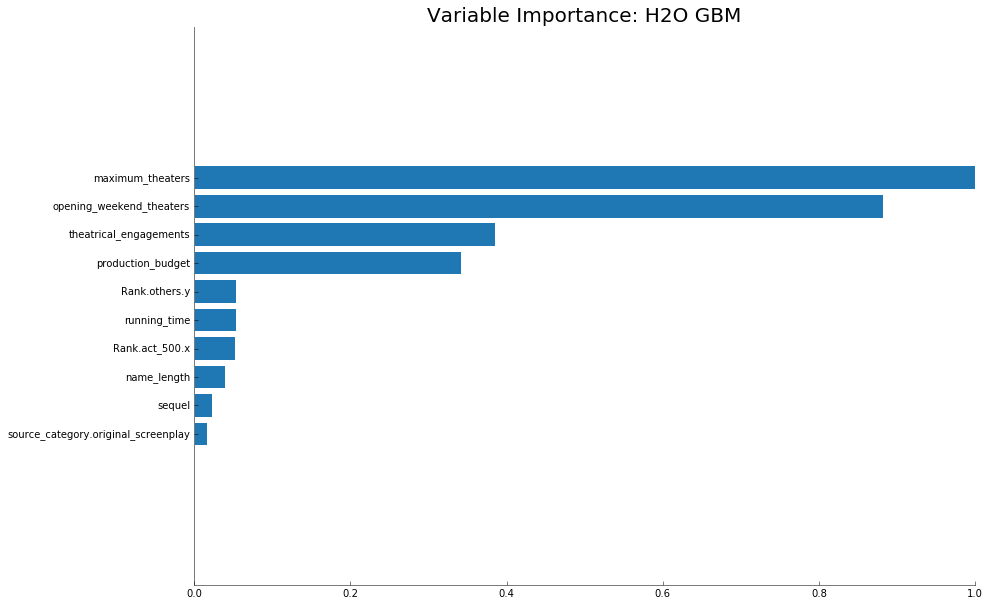

In [13]:
gbm_model.varimp_plot(num_of_features=10)

In [14]:
predictions = gbm_model.predict(test[:-1])

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [15]:
print(gbm_model.model_performance(test_data=test).r2())
print(gbm_model.model_performance(test_data=test).mse())

0.8663160713653524
27693802656756.91


In [16]:
test=test.cbind(predictions)
test_df=test.as_data_frame()
result = test_df.sort_values(['predict'],ascending=False)
result1 = result.reset_index(drop= True)

In [17]:
result1.head()

,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,opening_weekend_revenue,predict
0,6033,118060100,Jurassic World,Jurassic World,2015,124.0,1.0,4274,4291,36378,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,208806270,1.657416e+08
1,8610,196380100,Batman v Superman: Dawn of Justice,Batman v Superman Dawn of Justice,2015,151.0,1.0,4242,4256,25005,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,166007347,1.644709e+08
2,7779,173060100,Transformers: Age of Extinction,Transformers Age of Extinction,2014,165.0,1.0,4233,4233,22124,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100038390,1.402745e+08
3,9099,209020100,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where to Find Them,2016,133.0,0.0,4144,4144,26391,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,74403387,1.365472e+08
4,7959,178300100,The Hunger Games: Mockingjay - Part 2,Hunger Games Mockingjay Part 2 The,2015,136.0,1.0,4175,4175,25500,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,102665981,1.318924e+08


In [18]:
newdf = result1[result1.columns[59:61]]
newdf.head()

,opening_weekend_revenue,predict
0,208806270,1.657416e+08
1,166007347,1.644709e+08
2,100038390,1.402745e+08
3,74403387,1.365472e+08
4,102665981,1.318924e+08


In [20]:
%matplotlib inline

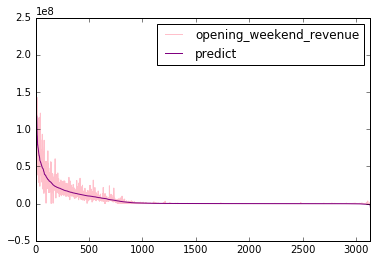

In [21]:
newdf.plot(color=['pink','purple'])